## Notes on Colors<br>
* **RGB**: Computer doesn't know that they are colors. "There are 3 intensity channels." is all the computer knows.<br>
<p align="center">
  <img width="313" height="257" src="./media/basics_rgb.png"><br>
  <i>Intensity Levels of The Channels</i>
</p>

* 0 is equal to "No color value" (No intensity) where 255 is "Full Color" (Full intensity). Each channel has this.

## Notes on OpenCv
* Written in C++ by Intel
* <code>cv2.waitKey(1) & 0xFF == 27:</code> (Here **27** is Esc, **ord("q")** is q.

***

### Basic Operations

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

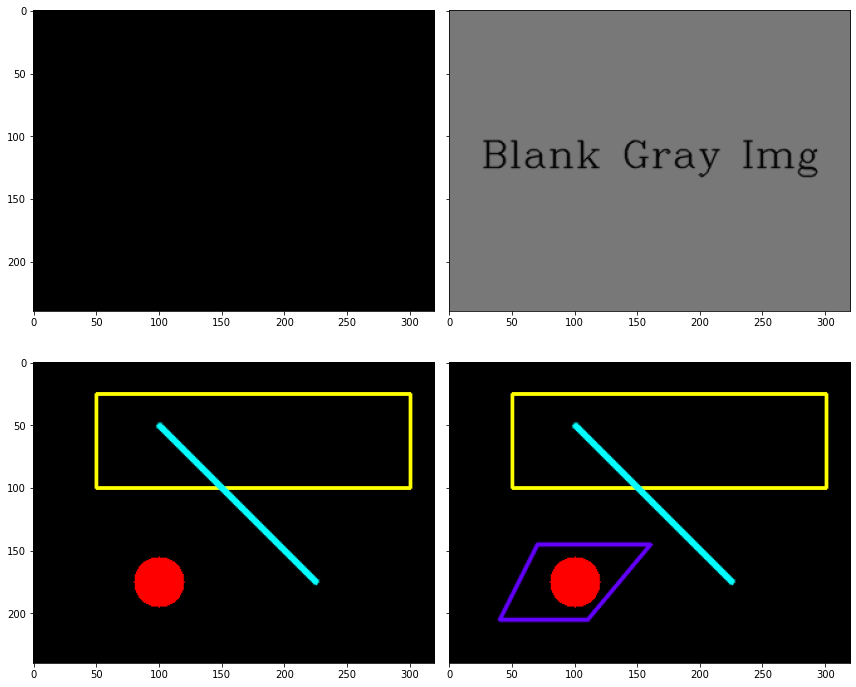

In [2]:
blank_img = np.zeros(
    shape=(240, 320, 3),
    dtype=np.uint8)
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(
    nrows=2,
    ncols=2,
    sharey=True,
    figsize=(12, 10))
# Image 0
ax1.imshow(blank_img)
# Image 1
gray_img = blank_img + 120
cv2.putText(
    img=gray_img,
    text="Blank Gray Img",
    org=(25, 125),
    fontFace=cv2.FONT_HERSHEY_COMPLEX,
    fontScale=1,
    color=(0, 0, 0),
    thickness=1,
    lineType=cv2.LINE_AA)
ax2.imshow(gray_img)

# Redefine the blank_img to draw smt on it again:
blank_img = np.zeros(shape=(240, 320, 3), dtype=np.uint8)
# Image 2
cv2.rectangle(
    img=blank_img,
    pt1=(50, 25),
    pt2=(300, 100),
    color=(0, 255, 255),
    thickness=2)
cv2.line(
    blank_img,
    pt1=(100, 50),
    pt2=(225, 175),
    color=(255, 255, 0),
    thickness=3,
    lineType=cv2.LINE_AA)
cv2.circle(
    img=blank_img,
    center=(100, 175),
    radius=20, 
    color=(0, 0, 255),
    thickness=-1)
ax3.imshow(blank_img[..., ::-1])

# Image 3
vertices = np.array(
    [[70, 145],
     [160, 145],
     [110, 205],
     [40, 205]],
    dtype=np.int32)
# vertices = vertices.reshape((-1, 1, 2))  # Doesn't need it?

cv2.polylines(
    img=blank_img,
    pts=[vertices],  # list for multiple polygons
    isClosed=True,
    color=(255, 0, 100),
    thickness=2,
    lineType=cv2.LINE_AA,
    shift=None)
ax4.imshow(blank_img[..., ::-1])
fig.tight_layout()
plt.show()

### Direct Drawing on Images with a mouse

Read later: [Mouse and Trackbar in OpenCV GUI](https://learnopencv.com/mouse-and-trackbar-in-opencv-gui/), [Check out the 'params' parameter](https://stackoverflow.com/questions/47114360/what-should-be-the-arguments-of-cv2-setmousecallback)

In [5]:
black_canvas = np.zeros((1024, 1024, 3), np.uint8)
is_drawing = False
# X & Y coordinates of upper left point of the rectangle:
uX, uY = (-1, -1)

# Click and hold to draw a circle
def draw_circle(event, x, y, flags, param) -> None:
    """
    This function draws circles on the canvas when the left
    button is pressed and hold.
    Args:
        event: Any kind of mouse event
        x: Coordinate x
        y: Coordinate y
        flags: Additional flags
        param: Additional parameters
    """
    global is_drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            cv2.circle(
                img=black_canvas,
                center=(x, y),
                radius=15,
                color=(0, 255, 255),
                thickness=-1,
                lineType=cv2.LINE_AA)
    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False

# Create and resize a rectangle by dragging the mouse
def draw_rectangle(event, x, y, flags, param):
    """
    This function draws rectangles on the canvas when the left
    button is pressed and hold.
    Args:
        event: Any kind of mouse event
        x: Coordinate x
        y: Coordinate y
        flags: Additional flags
        param: Additional parameters
    """
    global is_drawing, uX, uY
    if event == cv2.EVENT_LBUTTONDOWN:
        is_drawing = True
        uX, uY = (x, y)
    elif event == cv2.EVENT_MOUSEMOVE:
        if is_drawing:
            cv2.rectangle(
                img=black_canvas,
                pt1=(uX, uY),
                pt2=(x, y),
                color=(0, 0, 255),
                thickness=-1,
                lineType=cv2.LINE_AA)
    elif event == cv2.EVENT_LBUTTONUP:
        is_drawing = False
        cv2.rectangle(
                img=black_canvas,
                pt1=(uX, uY),
                pt2=(x, y),
                color=(0, 0, 255),
                thickness=-1,
                lineType=cv2.LINE_AA)

cv2.namedWindow("Draw Circles Here", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Draw Circles Here", draw_circle)
cv2.namedWindow("Draw Rectangles Here", cv2.WINDOW_NORMAL)
cv2.setMouseCallback("Draw Rectangles Here", draw_rectangle)

while True:
    cv2.imshow("Draw Circles Here", black_canvas)
    cv2.imshow("Draw Rectangles Here", black_canvas)
    
    if cv2.waitKey(1) & 0xFF in (27, ord("q")):
        break
        
cv2.destroyAllWindows()